In [5]:
#https://github.com/gengshan-y/VCN
#https://github.com/google-research/opticalflow-autoflow/blob/main/src/dataset_lib/augmentations/aug_params.py

In [1]:
import cv2
import numpy as np
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

from PIL import Image
from nnflow import flow_to_image, CustomDataloaderCreator

In [2]:
def plot_img_grid(imgs):
    imgs = torch.from_numpy(imgs.numpy().astype(np.uint8))
    #imgs = imgs.permute(0,3,1,2)
    
    plt.figure(figsize=(24,12))
    plt.axis('off')
    plt.imshow(make_grid(imgs, nrow=8).permute((1, 2, 0)))

In [11]:
if 'loader' in locals(): 
    del loader

loader = CustomDataloaderCreator(
    batch_size=1, shuffle=False, num_workers=4, pin_memory=True
)

loader.add_Kubric(
    root_dir="../../KubricFlow",
    split="validation",
    crop=False,
    crop_type="center",
    crop_size=[256,256],
    augment=False,
    norm_params= {"use":False, "mean":[127.5, 127.5, 127.5], "std":[127.5, 127.5, 127.5]},
    aug_params={}
)

loader.add_Kubric(
    root_dir="../../KubricFlow",
    split="validation",
    crop=True,
    crop_type="center",
    crop_size=[512,512],
    augment=True,
    norm_params= {"use":False, "mean":[127.5, 127.5, 127.5], "std":[127.5, 127.5, 127.5]},
    aug_params={
        "spatial_aug_params": {
            "enabled": True,
            "aug_prob": 0.0, 
            "stretch_prob": 0.0, #0.8, 
            "min_scale": 0.0, #-0.1, 
            "max_scale": 0.0, #1.0, 
            "max_stretch": 0.0, #0.2, 
            "flip": False, 
            "h_flip_prob": 0.0, 
            "v_flip_prob": 0.1
        },
        "color_aug_params":{
            "enabled": False,
            "aug_prob": 0.2, 
            "brightness": 0.4, 
            "contrast": 0.4, 
            "saturation": 0.4, 
            "hue": 0.5 / 3.14
        },
        "eraser_aug_params": {
            "enabled": False,
            "aug_prob": 0.5,
            "bounds": [50, 100]
        },
        "noise_params": {
            "enabled": False,
            "aug_prob": 0.5,
            "noise_std_range": 0.06
        },
        "spatial_params": {
            "enabled": True,
            "scale": [0.3, 0.03, 0.1], # [0.3, 0.03, 0.1] [scale1, 0.03, scale2]
            "rot": [0.4, 0.03], #[0.4, 0.03] [rot1, 0.03]
            "trans": [0.4, 0.03], #[0.4, 0.03] [tran1, 0.03]
            "squeeze": [0.3, 0.], #[0.3, 0.] [squeeze1, 0.]
            "black": False
        },
        "translate_params": {
            "enabled": False, 
            "aug_prob": 0.0,
            "translate": 10,
        },
        "rotate_params": {
            "enabled": False,
            "aug_prob": 0.0,
            "degrees": 10,
            "delta": 0,
        }
    }
)

In [12]:
ds_no_aug = loader.dataset_list[0]
ds_aug = loader.dataset_list[1]

In [13]:
(img_no_aug, img2), flow = ds_no_aug[140]
(img_aug, img2), flow = ds_aug[140]

In [14]:
img_no_aug = img_no_aug.unsqueeze(dim=0)
img_aug = img_aug.unsqueeze(dim=0)

img_compare = torch.concat([img_no_aug, img_aug], dim=0)
img_compare.shape

torch.Size([2, 3, 512, 512])

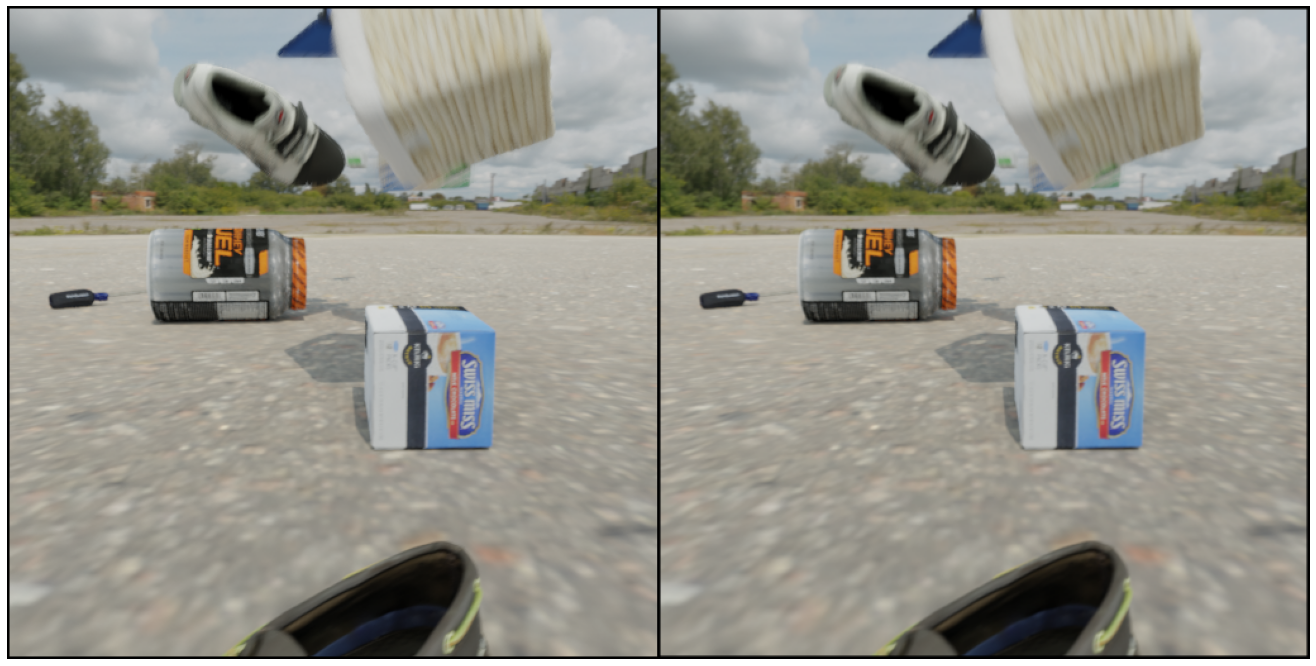

In [15]:
plot_img_grid(img_compare)